<a href="https://colab.research.google.com/github/andresgabas/DS2-Coderhouse/blob/main/DS2%20Primera%20Entrega%20Andres%20Gabas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
url = 'https://raw.githubusercontent.com/andresgabas/DS2-Coderhouse/main/ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(url)
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Abstract
Se trabajará con una base de datos descargada del sitio https://archive.ics.uci.edu/.

Esta base de datos es un .csv que recopila información de obesidad en Mexico, Perú y Colombia haciendo foco en los hábitos alimenticios y en la condición física.

Este trabajo está dirigido a profesionales de la salud del área de la nutrición. El objetivo del trabajo es crear un modelo de Machine learning que a partir de datos de pacientes se los pueda diagnosticar a partir de variables relacionadas con su salud.


Se tuvieron en cuenta las siguientes características para este estudio:

Gender (genero): Masculino o femenino.

Age (edad): Edad de la persona en años.

Height (altura): Altura de la persona en metros.

Weight (peso): Peso de la persona en kg.

Family_history_with_overweight (antecedentes_familiares): antecedentes de obesidad en la familia, si o no.     

FAVC (calorica): comen comida calórica frecuentemente.

FCVC (vegetales): incluyen vegetales en su dieta?

NCP (comidas_principales): Catidad de comidas principales

CAEC (come_entre_comidas): Si comen entre comidas, y la frecuencia.

Smoke (fumador): Si o no.

CH2O (consumo_de_agua): Consumo de agua diario, menos de 1 litros, más de un litro, más de 2 litros

SCC (control_calorias): Control de calorías diario, si o no.

FAF (actividad_fisica) Actividad física, días por semana.

TUE (actividades_sedentarias): cantidad de horas 0 a 2, 3-5, más de 5

CALC (consumo_alcohol): Consume alcohol, no, a veces, frecuentemente o siempre.

MTRANS (medio_de_transporte): Medio de transporte utilizado Auto, moto, bicicleta, transporte público o caminar.  

Nivel de Obesidad (nivel_obesidad): Según peso: peso insuficiente, normal, sobrepeso 1 y 2, obesidad tipo 1, 2 y 3.

Objetivos:

*   Buscar las variables permitan generar un modelos de clasificación que ayuden a clasificar a los diferentes pacientes según su peso.

*   Crear modelos de Machine Learning de aprendizaje supervisado y no supervisado.

*   Buscar las variables que permitan definir un modelo de machine learning de regresión que permita en base a esas características, determinar si un paciente sufre de obesidad o ubicar en que área de peso se encuentra de las
categorías descriptas en la variable nivel_obesidad.

Hipótesis a comprobar:

*   Las personas que más actividad física hacen tienen peso normal.
*   Las personas que comen más vegetales suelen tener peso normal.
*   Las personas que más comidas principales comen son obesas.
*   Las personas que utilizan la bicicleta o caminand como medio de transporte tienen peso normal.

   








In [ ]:
data.columns = ['genero','edad','altura','peso','antecedentes','calorica','vegetales','comidas_principales','come_entre_comidas','fumador','consumo_agua','consumo_calorias','actividad_fisica','actividad_sedentaria','consumo_alcohol','medio_de_transporte','nivel_obesidad']

In [ ]:
data.describe().round(2)

,edad,altura,peso,vegetales,comidas_principales,consumo_agua,actividad_fisica,actividad_sedentaria
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,1.70,86.59,2.42,2.69,2.01,1.01,0.66
std,6.35,0.09,26.19,0.53,0.78,0.61,0.85,0.61
min,14.00,1.45,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,1.63,65.47,2.00,2.66,1.58,0.12,0.00
50%,22.78,1.70,83.00,2.39,3.00,2.00,1.00,0.63
75%,26.00,1.77,107.43,3.00,3.00,2.48,1.67,1.00
max,61.00,1.98,173.00,3.00,4.00,3.00,3.00,2.00


En la tabla vemos el resultado del comando describe, este nos permite tener un primer panorama de algunos estadísticos básicos como la media y el desvío estandard. Este nos da una primera impresión de las variables numéricas.

**Variables categóricas**

Primero se analizarán las variables categóricas.

Text(0.5, 1.0, 'Porcentaje de hombres y mujeres')

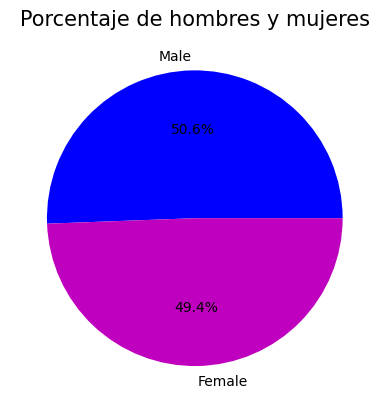

In [ ]:
genero_count = data['genero'].value_counts()
plt.pie(genero_count, labels=genero_count.index, autopct='%1.1f%%', colors= ['b','m'])
plt.title('Porcentaje de hombres y mujeres', size=15)

En piechart se observa que la proporción de hombres y mujeres es practicamente similar.

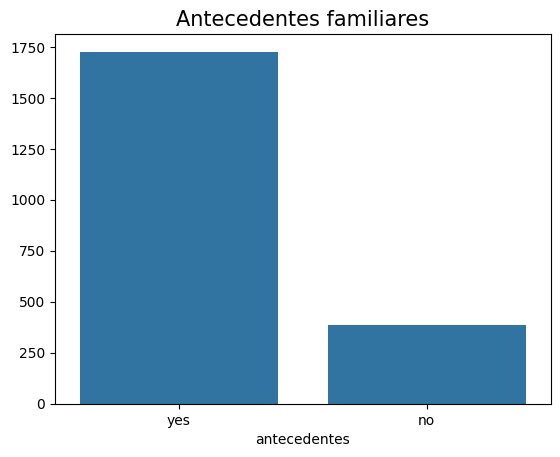

In [ ]:
antecedentes_count = data['antecedentes'].value_counts()
sns.barplot(x=antecedentes_count.index, y=antecedentes_count.values)
plt.title('Antecedentes familiares', size=15)
plt.show()

En este gráfico observamos que la mayoría de los participantes tienen antecedentes familiares de obesidad.

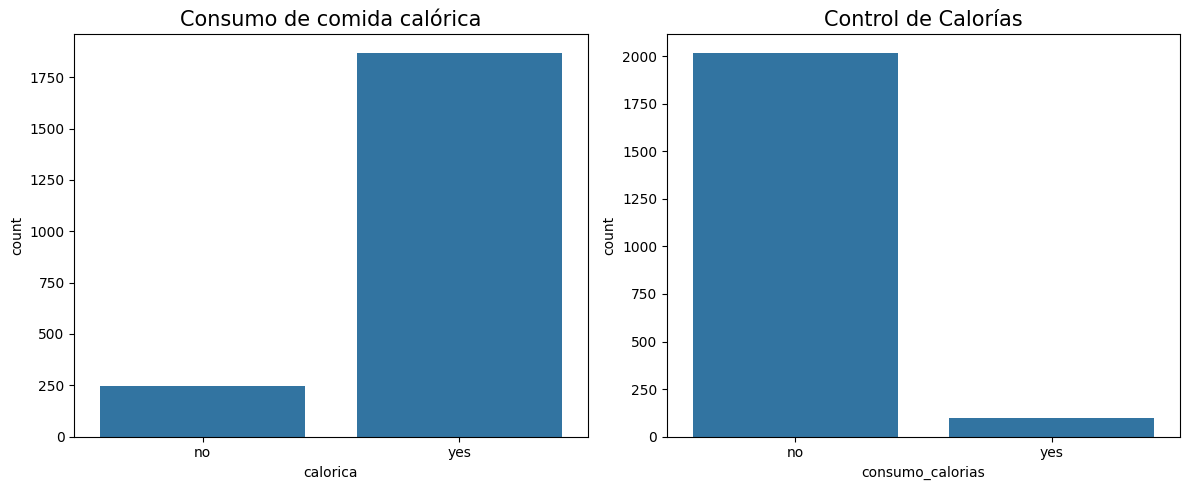

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='calorica', data=data, ax=axes[0])
axes[0].set_title('Consumo de comida calórica', size=15)

sns.countplot(x='consumo_calorias', data=data, ax=axes[1])
axes[1].set_title('Control de Calorías', size=15)

plt.tight_layout()
plt.show()


Estos gráficos se observa que pocos participantes controlan su consumo de calorías y al mismo tiempo son muchos los que consumen comida calórica.

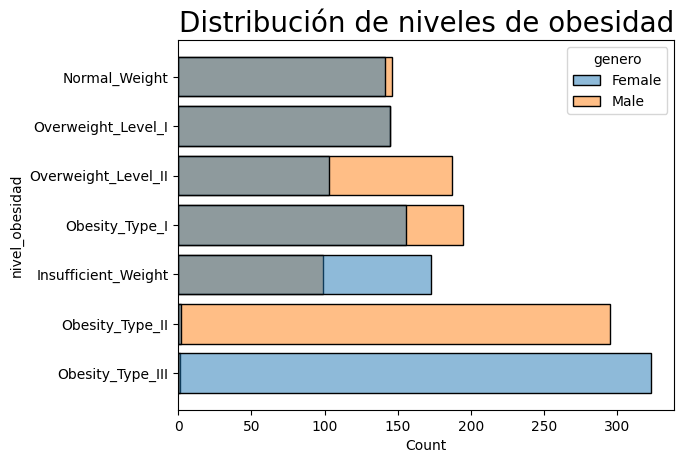

In [ ]:
sns.histplot(data=data, y ='nivel_obesidad',shrink=0.8,hue='genero')
plt.title('Distribución de niveles de obesidad', size=20)
plt.show()

En el histograma vemos zonas comunes en gris, naranja para hombres y azul para mujeres, esto es gracias al parámetro hue que nos permite agregar un nivel más de información.

Vemos que las mujeres son mayoría en casi todas las categorías, pero en la categoría de obesidad tipo 3 casi todos son hombres, mientras que en obesidad tipo 2 casi todas son mujeres.

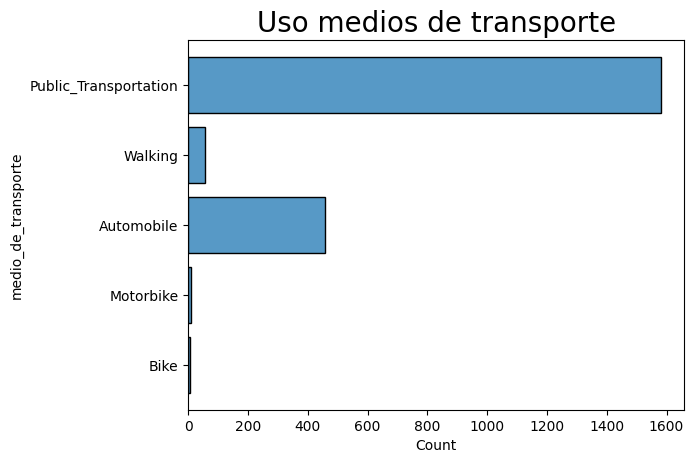

In [ ]:
sns.histplot(data=data, y='medio_de_transporte', shrink=0.8)
plt.title('Uso medios de transporte', size=20)
plt.show()

La mayor parte de los participantes utilizan el transporte público o el auto, pero no se ve que caminen o anden en bicicleta que son factores que colaborarían a que no haya obesidad junto con otros hábtos.

Luego de analizar las variables categóricas, creo que se podría generar un modelo de clasificación teniendo en cuenta las variables de control de calorías, consumo de comidas calóricas y medio de transporte utilizado por los encuestados.

Habiendo usado el parámetro hue en varios gráficos no parece ser una variable que me ayude a determinar una diferencia.

**Varianles numéricas**

Para empezar el estudio de las variables numéricas primero realizo una matriz de correlación para ver que variables están correlacionadas.

Luego con la librería seaborn realizo un Heatmap para poder interpretar mejor los resultados obtenidos.

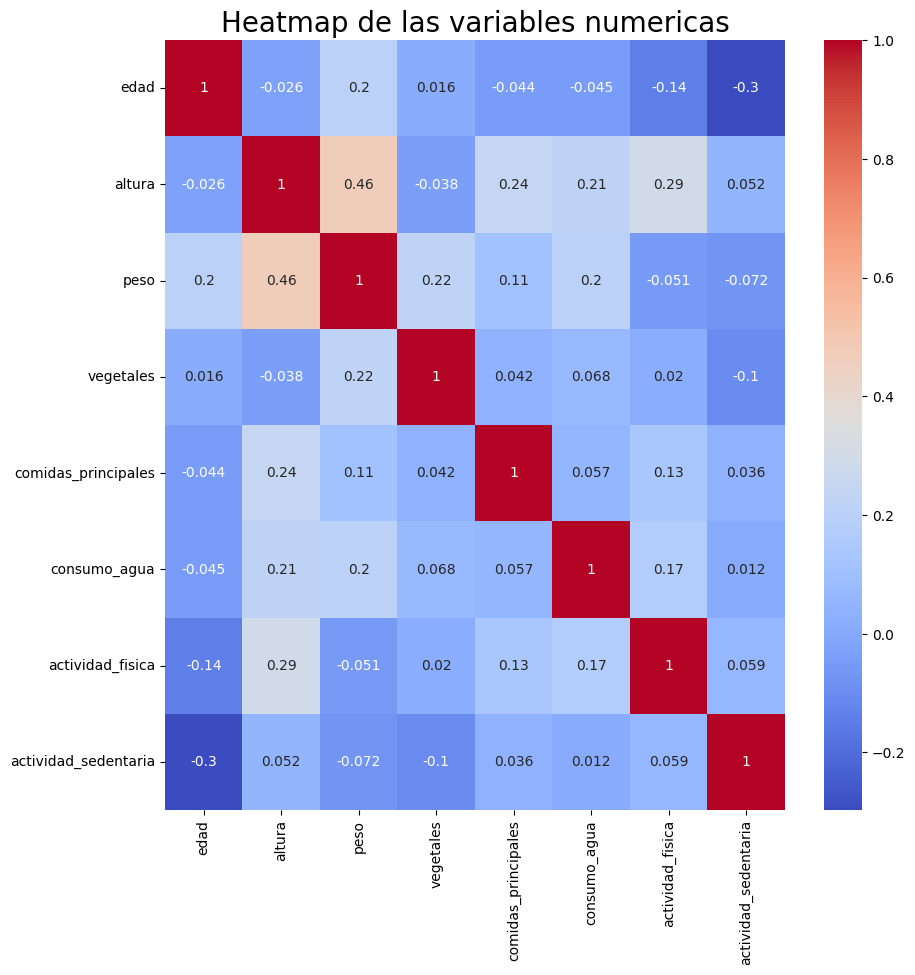

In [ ]:
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap de las variables numericas', size=20)
plt.show()


En el heatmap se observa que las variables con mayor correlación son altura y peso. Esto se verificará más adelante en un scartterplot

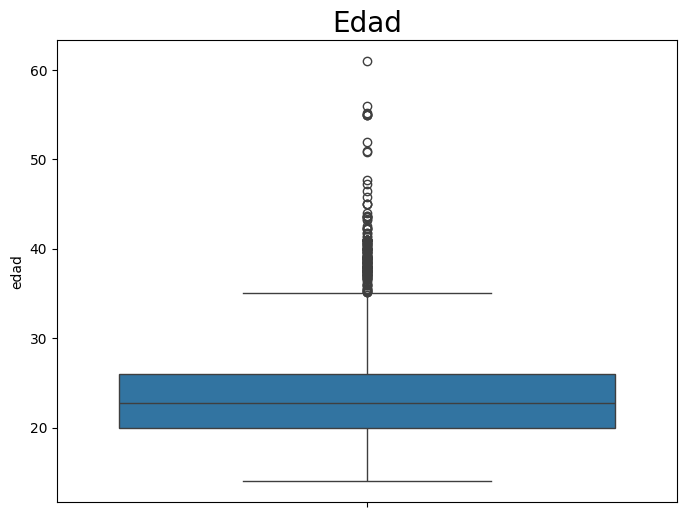

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['edad'])
plt.title('Edad', size=20)
plt.show()

En el boxplot de edad podemos observar que la mayor parte de los encuestados para este estudio se encuentran entre los 20 y los 30 años especialmente cerca de los 20 años. de hecho la media para esta variable es de 24.4 años.

Se observan varios outliers en el gráfico que en realidad no lo son por que son valores de edad lógicos.

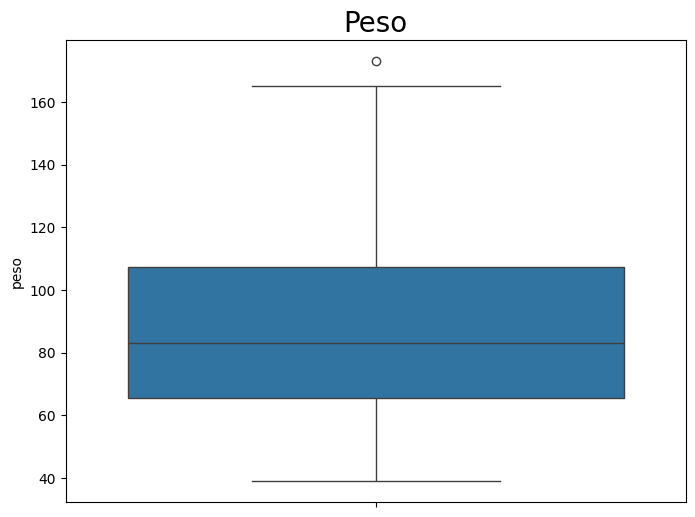

In [ ]:
# Boxplot of peso
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['peso'])
plt.title('Peso',size=20)
plt.show()

La mayor parte de los encuestados en el estudio se encuentran en un peso mayor de 60 y menor a 120. Se observan un outlier pero no parece ser un valor de peso ilógico.

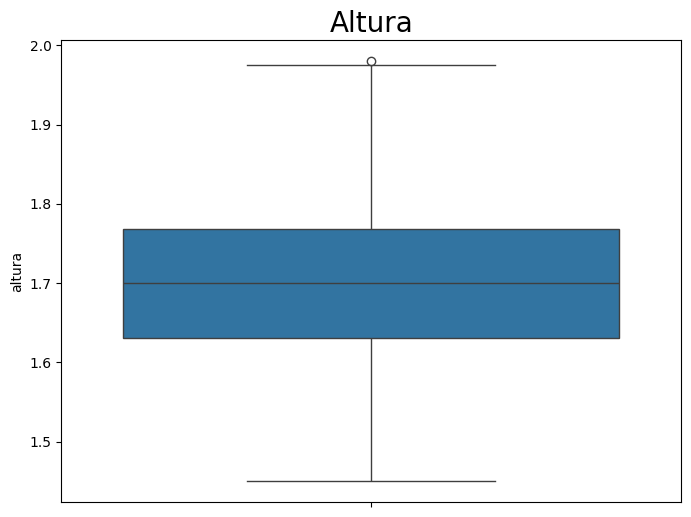

In [ ]:
# Boxplot of altura
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['altura'])
plt.title('Altura',size=20)
plt.show()

En el gráfico de altura la mayor parte de los encuestados se encuentran entre 1.60 y 1.80 metros y un solo caso que el boxplot lo marca como outlier que es una altura muy por encima del normal del grupo estudiado.

Text(0.5, 1.0, 'Relación entre altura y peso según nivel de obesidad')

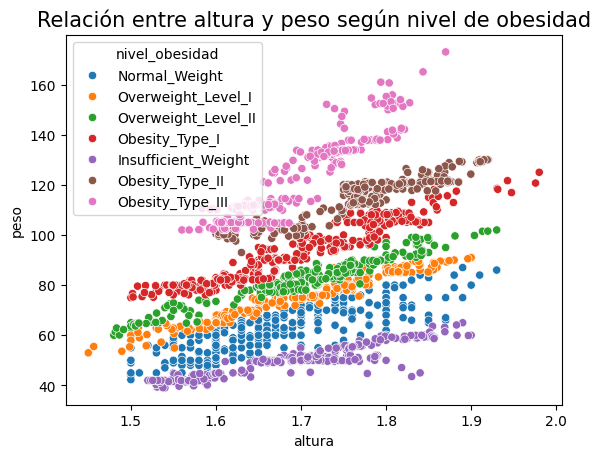

In [ ]:
sns.scatterplot(data=data, x="altura", y="peso", hue='nivel_obesidad')
plt.title('Relación entre altura y peso según nivel de obesidad', size=15)

En este gráfico observamos una correlación positiva entre las variables altura y peso, tal como observamos en el heatmap mostrado previamente.

El peso y la altura podrían ser variables candidatas para un modelo de regresión ya que practicamente se distinguen claramente los grupos en estudio.